In [17]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, KFold
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv("Assets/datasets/trabfin")

In [3]:
df1 = df[df.rent<= 100000]

# Executive Summary:

The purpose of this project is predicting the renting price of apartments in Hong Kong. Hong Kong is a country with a population of 7.3 millions habitants and a total land area of 1.106 square kilometers, being the fourth most densely populated sovereign state in the world. The prices for renting or buying an apartment are way far from the the normal salary, making impossible for a common worker to afford the price to invest in buying a property.

The median salary in HK is around 15k HKD while people who works in Financial, Sanitary and Engineering Industry can earn between 30-90k HKD. Regardless if your job is well paid or not, is still a challenge to save enough money to buy a property. That's why HK society spend their money in other purpouses, such as cars, luxury products...

The objective of this project is extracting the data from a real state website, analize it, and predict the renting price of an apartment depending on the location, bedrooms, floor, and other features.
This project is divided in 2 parts:

-Model for predicting price for rental

-Model for predicting the range of rental prices for a property

Using both models will help the users to compare the prices from a real estate agency with the ones gave by both models, and check if the price is adjusted.

# Identification of Outliers:

After extracting all the data, there were some features that were suspected to have errors:

-Age: Apartments with an age between 100-200 years. It's clear that there was a mistake at the time of introducing the data in the advertising website. Replaced it by the median age of an apartment of this size.

-Gross Area and Saleable Area: In general, the gross area will always be bigger or same as the saleable area. In some properties there was the need to fix this problem.

-Rent: From all the data extracted from the website, 44230 apartments were obtained. Only 1 % of the total number of apartments have a renting price of 100k HKD or more. Based on the median salary in Hong Kong and the hipotesis that only a small percentage of the total population would be interested in renting a property with these conditions, the dataset was settle for apartments with prices around 5 to 100k HKD. As I mentioned before, the idea of this project is trying to reach the biggest number of people and makes no sense using this extra 1% data.

As I mentioned before, for the biggest part of the population, checking for an apartment with renting prices higher than 100k makes no sense. That's the reason that this data was cut from our dataset.

# Description of how you defined your variables:

Predicting the price for apartments basicaly needs the interaction of different types of features that you can find in a property such as:

-Age: Numeric

-Bathroom: Numeric

-Bedroom: Numeric

-Floor: Categorical G/F, Low, Medium, High

-Latitude and Longitude : Numeric

-Property Type: Categorical House, Flat

-Gross Area, Saleable Area: Numeric

-Distance to the closest MTR: Numeric

-Label: defines the area where the property is

-Attributes: Text -> This feature is not used, but in the feature can be, using a countvectorizer to extract more information.

# Discussion of model selection and implementation:



In [4]:
#Shuffle the data and using only the data with a rental price lower or equal than 100k HKD:

df = df.reindex(np.random.permutation(df.index))

df1 = df[df.rent <= 100000]


#Selection of features:
X_col = [ "type"  ,"bathh", "gross", "habit", "distance", "edad", "lat", "lng"]
X = df1[X_col]
y = df1.rent

## Testing different regressor models:

For the prediction of the renting price of a property, I started using different regression models. The idea is to check how each models works with our data and see if there are big differences between them.

C:\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


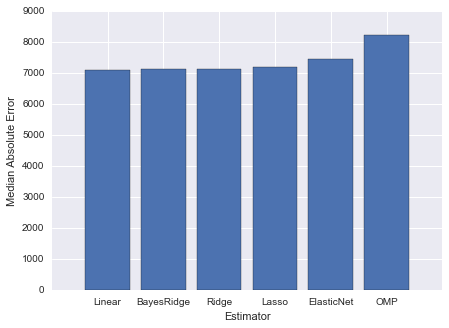

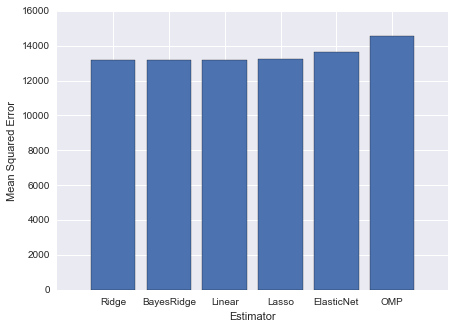

In [5]:
#Using different models to predict the price of renting an apartment. Compare them and look at the Mean Square Error for each one:

rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])
errvals1 = np.array([])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    this_other_error = math.sqrt(np.mean((e.predict(X_test) - y_test)** 2 ))
    errvals = np.append(errvals, this_err)
    errvals1 = np.append(errvals1, this_other_error)
    x = errvals1[0:6]
    
pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')
plt.show()

pos = np.arange(x.shape[0])
srt = np.argsort(x)
plt.figure(figsize=(7,5))
plt.bar(pos, x[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Mean Squared Error')


As we can see on the graph, all models works in a similar way, being OMP the one with a worse performance. Regardless a score of 0.88 in the best model, the MSE is around 15k HKD. If the median renting price of an apartment is around 38k HKD, the error is around 50 %

In [7]:
print math.sqrt(np.mean((e.predict(X_train) - y_train)** 2 ))

15660.8920152


In [235]:
y_pred = best.predict(X_test)

In [237]:
best.score(X_test, y_test)

0.88176432162080687

## GradientBoosting:

After seeing that all the models except one works in the same way and the MSE is high, I decided to use the GradientBoosting algorithm and test it. I've obtained better results, the only problem using this model is taking care of no overfitting it.

In [230]:
#Use Gridsearch to find the best estimator for our model (GradientBoostingRegressor), 
#increasing the accuracy and reducing the error:



tuned_parameters = {
    "n_estimators": [ 1400],
    "max_depth" : [ 12],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 50],
    "loss" : [ 'ls', 'lad' ]
}

gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='median_absolute_error', n_jobs = 4)
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_

#Fitting the model, predicting the price and calculation the mean square error of the model:
model = best.fit(X_train, y_train)
y_pred = model.predict(X_test)
print math.sqrt(np.mean((best.predict(X_train) - y_train)** 2 ))

7770.89809861


The MSE error was reduced to 7k HKD, that's a 16% error of the total price.

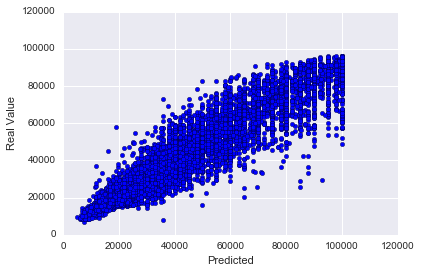

In [239]:
#Plotting the predicted and real values:
plt.scatter(y_test, y_pred)
plt.xlabel('Predicted')
plt.ylabel('Real Value')


1) Regardless the model having an accuracy of 89%, the mean square error is around 7k HKD. The highest percentage of properties are around the 30-40k renting price, meaning that our error is around 16% of the total price. The idea is going deeper using gridsearch on the models, trying to reduce the mse and add other features that will help the model distinguish between one property and another. Right now it can help to estimate the renting of an apartment, being conscious that the number can vary 
+-7k.

2) Next step of the project is group the properties into 3-5 bins using all whole dataset and predict in which one of these      subgroups our apartment will be placed in.

3) Combining the first and second method can help the user feel more comfortable and trust the system. 

4) Last step would be comparing the % of business each one of the real state agencies have compared with the rest. That not only helps the agencies, checking how their business is devoloping towards other companies, but also for clients who are interested in renting, they can find the real state agency that can suits better their interests.

5) using CountVectorizer in the attr column, it is possible to extract around 80 more features that will define better each property. Using this data it is possible to reach a MSE of 5k HKD.


## Bagging + KNN:

The reason I used KNN + Bagging for this model and not a GradientBoostingClassifier was because I wanted to experiment with other types of algorithms and learn how it works. The results are good but probably if I used gradient, the model will improve.

In [15]:
#Created the model that will classify the apartments in 4 bins: {<20k, 20k<>45k, 45k<>80k, >80k}
df = pd.read_csv('assets/datasets/workproject')
                 
df = df.dropna()

listprice = []
for i in df.rent:
    if i< 20000:
        listprice.append("cheap")
    elif i > 20000 and i < 45000:
        listprice.append("medium")
    elif i > 45000 and i < 80000:
        listprice.append("high")
    else:
        listprice.append("very high")

df["rentyp"] = listprice

columns_to_use = [ "gross", "salar", "habit", "bathh", "edad", "lat", "lng", "type", "distance", "nivel", "district_label" ]


X = df[columns_to_use]

y = df.rentyp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                 
                 
baggingknn = BaggingClassifier(KNeighborsClassifier())

bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y_train), n_folds=3, shuffle=True))

model1 = gsbaggingknn.best_estimator_
model2 = model1.fit(X_train, y_train)

We end up having a model with a score and precision of 80%

In [25]:
y_pred = model2.predict(X_test)
a = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print cm
print cr
print a

[[1295    5  551    1]
 [   1 2464  376  294]
 [ 215  327 4576   25]
 [  86  467  304 2263]]
             precision    recall  f1-score   support

      cheap       0.81      0.70      0.75      1852
       high       0.76      0.79      0.77      3135
     medium       0.79      0.89      0.84      5143
  very high       0.88      0.73      0.79      3120

avg / total       0.80      0.80      0.80     13250

0.799849056604


# Visualizations:

In [ ]:
df.info()

In [30]:
distric = df.groupby(by="distritofull").rent

As We can see in the graphs, the 5 most expensive districts are the ones from Shek O to Chung Hom Kok, being the Shek O and 
The Peak the most expensive areas from whole Hong Kong (200k HKD). On the other hand, districts like Mui Wo or Sham Shui Po, the median 
price for renting an apartment is 11k HKD

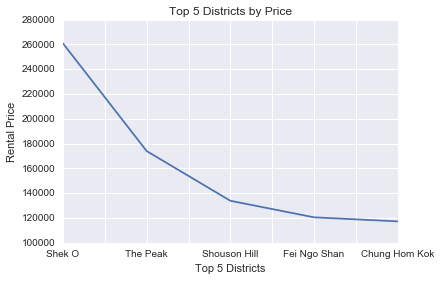

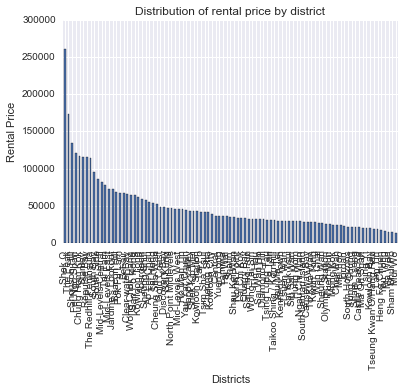

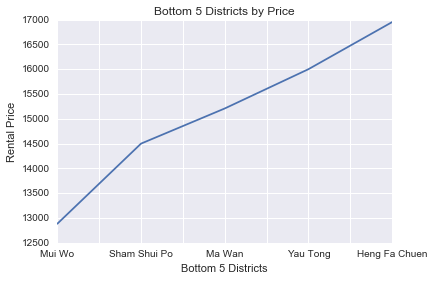

In [97]:
distric.mean().sort_values(ascending = False).head(5).plot()
plt.xlabel('Top 5 Districts')
plt.ylabel('Rental Price')
plt.title("Top 5 Districts by Price")
plt.show()
distric.mean().sort_values(ascending = False).plot.bar()
plt.xlabel('Districts')
plt.ylabel('Rental Price')
plt.title("Distribution of rental price by district")
plt.show()
distric.mean().sort_values(ascending = True).head(5).plot()
plt.xlabel('Bottom 5 Districts')
plt.ylabel('Rental Price')
plt.title("Bottom 5 Districts by Price")



In [84]:
pes = []
for i in df.gross:
    if i< 500:
        pes.append("500")
    elif  i < 1000:
        pes.append("1000")
    elif i < 2000:
        pes.append("2000")
    else:
        pes.append("big")
        
df["pes"] = pes

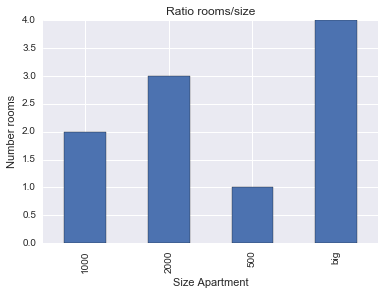

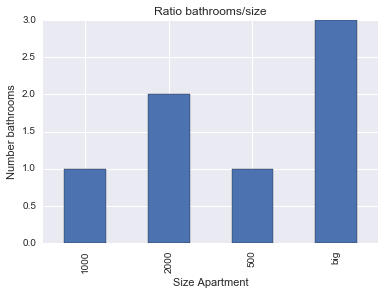

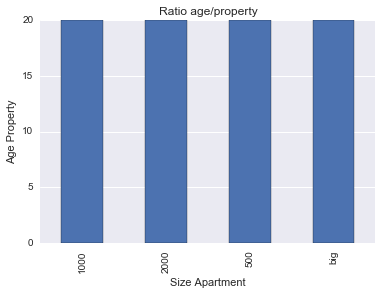

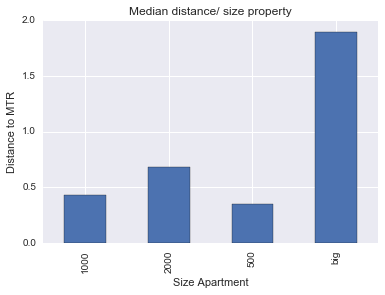

In [98]:
df.groupby(by = "pes").habit.median().plot.bar()
plt.xlabel('Size Apartment')
plt.ylabel('Number rooms')
plt.title("Ratio rooms/size")
plt.show()
df.groupby(by = "pes").bathh.median().plot.bar()
plt.xlabel('Size Apartment')
plt.ylabel('Number bathrooms')
plt.title("Ratio bathrooms/size")
plt.show()
df.groupby(by = "pes").edad.median().plot.bar()
plt.xlabel('Size Apartment')
plt.ylabel('Age Property')
plt.title("Ratio age/property")
plt.show()
df.groupby(by = "pes").distance.median().plot.bar()
plt.xlabel('Size Apartment')
plt.ylabel('Distance to MTR')
plt.title("Median distance/ size property")


- In these last 2 graphs we can observe how the biggest apartments, normaly located in areas far from the city centre, the distance between the property and the closest MTR Station is way bigger than properties with a size around 0.5 - 1k.

- In general, all properties in hong kong, regardless the size of the property, have a similar age around 20 years old.

- For the number of bathrooms and rooms, it's logical that bigger the property, the number of this features will increase.

Finaly in this url there is a visualization on how HK properties are distributed around the island by renting price:

https://public.tableau.com/views/Libro1_334/Hoja1?:embed=y&:display_count=yes

With the final results, using the 2 models described before, is possible for the user to know the price range of the apartment that he/she is looking for, and decide if the price offered in a real state agency makes sense

The next steps of this project are:
    
- Keep improving the models used to predict the price and the bins, add new features such as crime rate, distance to hospitals, restaurants...

- Try using other algorithms that probably can improve the results.

- Build a predicting API that will allow the user make this comparision at the time he/she is checking for an apartment in a website or in a real state agency.

- Visualize how real state agencies manage this business and see the ones who owns p
    -